# Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Steps:

In [2]:
#1: Loading the data from the text files created
#2: Finding the Joint probability inlog format of all the emails for both spam and ham
#3: Making predictions
        #Simplyfying the above joint probability
        #Checking for higher Joint probability
#4: Calculating accuracy
#5: Visualizing the results
        #Decision boundary
#6: Using Seaborn for better visualization
#7: Testing the accuracy of the model:
        #Calculating False positive and False Negative 
        #Calculating Recall Metric

# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the data

In [4]:
#Features:
X_test =  np.loadtxt(TEST_FEATURE_MATRIX,delimiter = ' ')
#Target:
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter = ' ')
#Token probabilities:
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter = ' ')

In [5]:
#UNDERSTANDINGS:
#E-mail= "HEY FRIEND , WANT APPLE?" - Probability =  p(Hey)*p(Friend)*p(want)*p(apple) 

# Dot product:

In [6]:
a=np.array([1,2,3])
b=np.array([1,2,3])
print(a.dot(b))

14


In [7]:
print(X_test.dot(prob_token_spam).shape)

(1723,)


In [8]:
X_test.shape

(1723, 2500)

In [9]:
PROB_SPAM = 0.3116 #value calculated in previous module
#END OF UNDERSTANDINGS

## Joint probability in log format

## Set the prior 
$$p(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [10]:
#Calcuating the Joint probability for Spam emails:
joint_log_spam =  X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

$$p(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, P(Ham)} {P(X)}$$

In [11]:
#Calculating the joint probability for all the non-spam emails:
joint_log_ham =  X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

# Making predictions

### Checking for higher joint probability

$$P(SPAM \, | \, X) \, > \, P(HAM \, | \, X)$$
<center>OR</center>
$$P(SPAM \, | \, X) \, < \, P(HAM \, | \, X)$$

In [12]:
prediction = joint_log_spam > joint_log_ham

In [13]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [14]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify
$$P(Spam | X) \, P(Spam) != \frac{P(Spam | X) \, P(Spam)}{P(X)}$$

In [15]:
joint_log_spam =  X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham =  X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation
### Calculating accuracy

In [16]:
correct_docs = (prediction == y_test).sum()
print('The number of correct predictions:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('The number of incorrect predictions:',numdocs_wrong)
#Accuracy:
print('Percentage of correct prediction:{:.2%}'.format(correct_docs/len(X_test)))
print('Percentage of incorrect prediction:{:.2%}'.format(numdocs_wrong/len(X_test)))

The number of correct predictions: 1671
The number of incorrect predictions: 52
Percentage of correct prediction:96.98%
Percentage of incorrect prediction:3.02%


# Visualizing the results

In [17]:
#Chart Styling:
linedata = np.linspace(-14000,1,1000)
xaxis_label = 'P(X | Ham)'
yaxis_label = 'P(X | Spam)'

## Decision Boundary

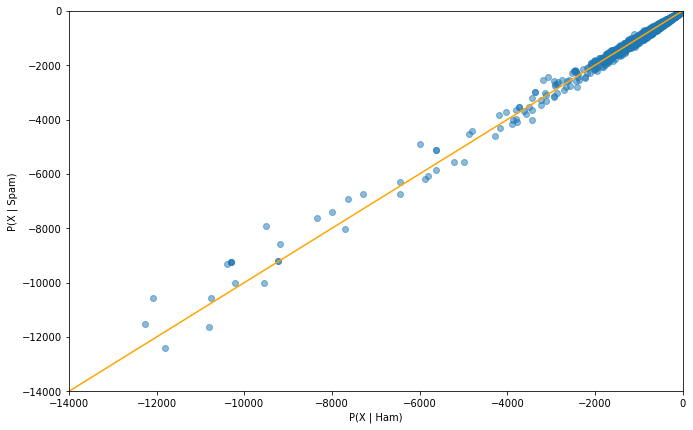

In [18]:
#Plotting the Graph:
plt.figure(figsize=(11,7))
plt.xlabel('P(X | Ham)')
plt.ylabel('P(X | Spam)')

#Set limit:
plt.xlim([-14000,1])
plt.ylim([-14000,1])

#Values:
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5)
plt.plot(linedata,linedata,color='orange')
plt.show()

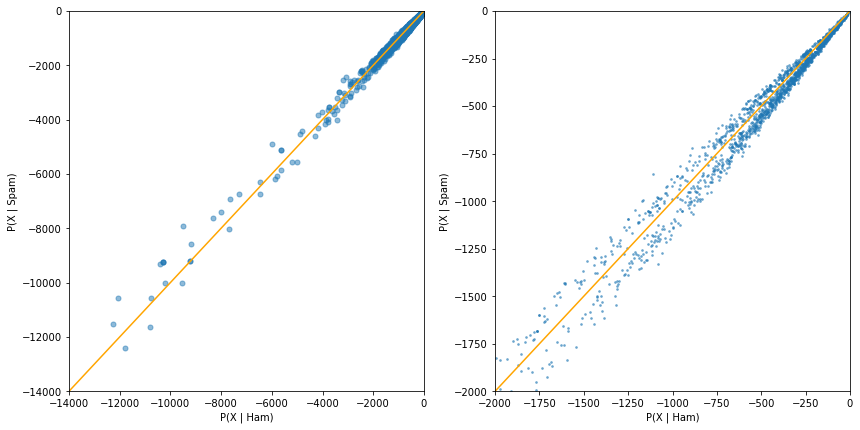

In [19]:
#Plotting the Graph:
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
#Chart 1:
plt.xlabel('P(X | Ham)')
plt.ylabel('P(X | Spam)')

#Set limit:
plt.xlim([-14000,1])
plt.ylim([-14000,1])

#Values:
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')
#plt.show()

plt.subplot(1, 2, 2)
#Chart 2:
plt.xlabel('P(X | Ham)')
plt.ylabel('P(X | Spam)')

#Set limit:
plt.xlim([-2000,1])
plt.ylim([-2000,1])

#Values:
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=3)
plt.plot(linedata,linedata,color='orange')
plt.show()

# Using Seaborn for visualization

In [20]:
#Chart using Seaborn:
sns.set_style('whitegrid')
labels='Actual Category'

summary_df = pd.DataFrame({xaxis_label:joint_log_ham,yaxis_label:joint_log_spam,labels:y_test})

C:\Users\Danush\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(-2000.0, 1.0)

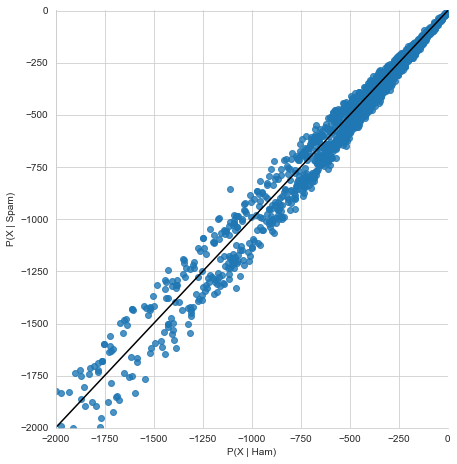

In [21]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,
           scatter={'alpha':0.7,'s':25}) #fit_reg- Regression line
plt.plot(linedata,linedata,color='black')
plt.xlim([-2000,1])
plt.ylim([-2000,1])

C:\Users\Danush\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


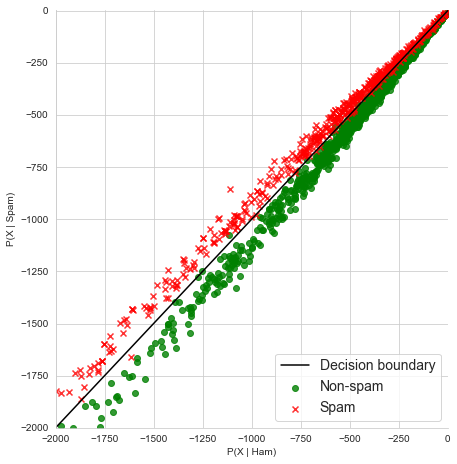

In [22]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg=False,legend=False,
           scatter={'alpha':0.7,'s':25},hue=labels,markers=['o','x'],palette=['green','red']) #fit_reg- Regression line
plt.plot(linedata,linedata,color='black')
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.legend(('Decision boundary','Non-spam','Spam'),loc='lower right',fontsize=14)

# False positive and False negatives

In [23]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1163,  560], dtype=int64))

In [24]:
#Calculating True positive:
true_pos = (y_test==1) & (prediction==1) #Bitwise AND
true_pos.sum()

548

In [25]:
#Calculating False positive:  (A non-spam email wrongly predicted as spam):
false_pos = (y_test==0) & (prediction==1) #Bitwise AND
false_pos.sum()

12

In [26]:
#Calculating False negative:(A spam email wrongly predicted as non-spam):
false_neg = (y_test==1)  & (prediction==0)
false_neg.sum()

40

## Recall Metric

In [27]:
#Calculating Recall-score:
recall_score = true_pos.sum()/ (true_pos.sum() + false_neg.sum())
print('The recall score is {:.2%}'.format(recall_score))

The recall score is 93.20%


## Precision Metric

In [28]:
#Calculating the Precision-score:
precision_score = true_pos.sum()/ (true_pos.sum() + false_pos.sum())
print('The precison score is {:.3%}'.format(precision_score))

The precison score is 97.857%


## F-score or F1 score

In [29]:
#Calculating F-score(Ironic mean of Precison and recall): 
f1_score = 2 * (precision_score * recall_score)/(precision_score + recall_score)
print('F score is: {:.2}'.format(f1_score))

F score is: 0.95
